# linear regression using python

This is a project created based on the one explained in https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/, in order to implement a step-by-step linear regression process with the objective of comparing its performance with that of specialized sklearn libraries for linear regression to verify the differences and implement new strategies for a better result with the use of optimizers.

##Dataset Used

The dataset used is a compilation of how the number of courses seen by a student and the time of hours studied influence the student's final grade. In this way it is interesting to work with this dataset because when working in a linear regression, it is interesting to see how each of the input parameters influences the expected output and to see that there really is a relationship between these parameters.

In addition, by understanding how each of the parameters influences the final output, it is possible to estimate how the hours studied or the number of courses should be modified in order to improve the grades and efficiency of a student, which would be very useful in education systems.

https://www.kaggle.com/datasets/yasserh/student-marks-dataset

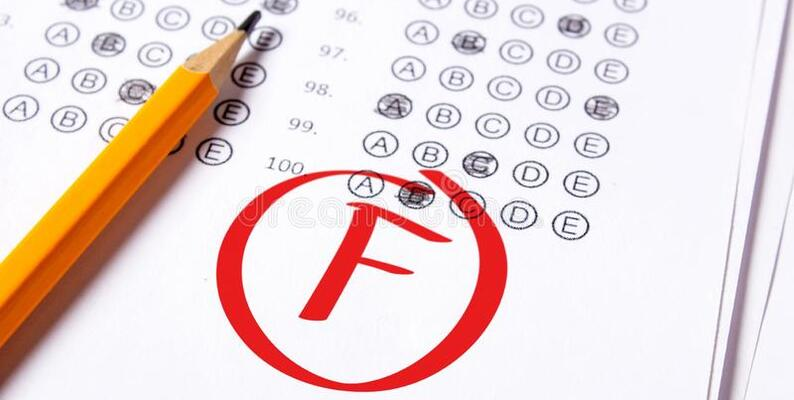

##Linear regression process

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d.axes3d import Axes3D

import plotly.graph_objects as go

In [ ]:

#variables to store mean and standard deviation for each feature
mu = []
std = []

def get_original_data(filename):

	df = pd.read_csv(filename)

	data = np.array(df, dtype=float)
 
	return data[:,:2], data[:, -1]

def load_data(filename):

	df = pd.read_csv(filename)

	print("Datos originales: \n"+str(df))

	data = np.array(df, dtype=float)
	normalize(data)

	return data[:,:2], data[:, -1]

def load_data2(filename):

	df = pd.read_csv(filename)

	data = np.array(df, dtype=float)
	normalize(data)

	return data[:,:2], data[:, -1]

def plot_data(x, y,z):

	z=np.array(z)
	z =z.flatten()

	fig = go.Figure(data=[go.Scatter3d(x=np.array(x), y=np.array(y), z=np.array(z),mode='markers')])

	fig.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))

def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate, num_epochs,op):

	if op=="SGD":

		m = x.shape[0]
		J_all = []
		
		for _ in range(num_epochs):
			h_x = h(x, theta)
			cost_ = (1/m)*(x.T@(h_x - y))
			theta = theta - (learning_rate)*cost_
			J_all.append(cost_function(x, y, theta))

		return theta, J_all 

	elif op=="GDM":

		m = x.shape[0]
		J_all = []

		b=0.9

		mm=0
		
		for _ in range(num_epochs):

			h_x = h(x, theta)
	 
			cost_ = (1/m)*(x.T@(h_x - y))
	 
			mm=b*mm-learning_rate*cost_
	 
			theta = theta + mm

			J_all.append(cost_function(x, y, theta))

		return theta, J_all

def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

def test(theta, x):
	x[0] = (x[0] - mu[0])/std[0]
	x[1] = (x[1] - mu[1])/std[1]

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
 
	return y
 

In [ ]:

x,y = load_data("/content/drive/MyDrive/ESPECIALIZACION IA/PRIMER SEMESTRE/HERRAMIENTAS MATEMATICAS Y COMPUTACIONALES/PARCIAL FINAL/PUNTO 3/Student_Marks.csv")

y = np.reshape(y, (100,1))
x = np.hstack((np.ones((x.shape[0],1)), x))

plot_data(x[:,1],x[:,2], y)


Datos originales: 
    number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]


In [ ]:

theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 250

theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs,"SGD")
J = cost_function(x, y, theta)

print("Cost: ", J)
print("Parameters: ", theta)


Cost:  [[6.05848103]]
Parameters:  [[24.41769   ]
 [ 3.33758794]
 [12.74756782]]


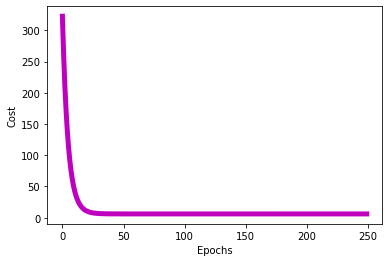

In [ ]:

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0

for i in J_all:

	jplot.append(i[0][0])
 
	n_epochs.append(count)
	count += 1
	
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)


In [ ]:

x_o,y_o= get_original_data("/content/drive/MyDrive/ESPECIALIZACION IA/PRIMER SEMESTRE/HERRAMIENTAS MATEMATICAS Y COMPUTACIONALES/PARCIAL FINAL/PUNTO 3/Student_Marks.csv")

y=[]

for i in x_o:

  y.append(test(theta,i))

y=np.array(y)
y =y.flatten()

fig = go.Figure(data=[go.Scatter3d(x=np.array(x_o[:,0]), y=np.array(x_o[:,1]), z=np.array(y),mode='markers')])

fig.show()


# Implementation with sklearn

In [ ]:

reg = LinearRegression().fit(x_o, y_o)

y_sklearn=[]

for i in x_o:

  p=reg.predict(np.array([i]))

  y_sklearn.append(p)

y_sklearn=np.array(y_sklearn)
y_sklearn =y_sklearn.flatten()

fig = go.Figure(data=[go.Scatter3d(x=np.array(x_o[:,0]), y=np.array(x_o[:,1]), z=np.array(y_sklearn),mode='markers')])

fig.show()


# New optimizer implementation

In [ ]:

x2,y2 = load_data2("/content/drive/MyDrive/ESPECIALIZACION IA/PRIMER SEMESTRE/HERRAMIENTAS MATEMATICAS Y COMPUTACIONALES/PARCIAL FINAL/PUNTO 3/Student_Marks.csv")

y2 = np.reshape(y2, (100,1))
x2 = np.hstack((np.ones((x2.shape[0],1)), x2))

theta2 = np.zeros((x2.shape[1], 1))
learning_rate2 = 0.1
num_epochs2 = 250


theta2, J_all2 = gradient_descent(x2, y2, theta2, learning_rate2, num_epochs2,"GDM")
J2 = cost_function(x2, y2, theta2)

print("Cost: ", J2)
print("Parameters: ", theta2)


Cost:  [[6.05848103]]
Parameters:  [[24.41767504]
 [ 3.33756996]
 [12.74756124]]


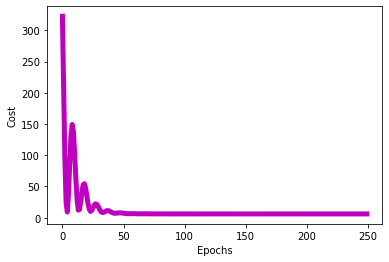

In [ ]:

#for testing and plotting cost 
n_epochs2 = []
jplot2 = []
count2 = 0

for i in J_all2:

	jplot2.append(i[0][0])
 
	n_epochs2.append(count2)
	count2 += 1
	
jplot2 = np.array(jplot2)
n_epochs2 = np.array(n_epochs2)
plot_cost(jplot2, n_epochs2)


In [ ]:

x_o2,y_o2= get_original_data("/content/drive/MyDrive/ESPECIALIZACION IA/PRIMER SEMESTRE/HERRAMIENTAS MATEMATICAS Y COMPUTACIONALES/PARCIAL FINAL/PUNTO 3/Student_Marks.csv")

y2=[]

for i in x_o2:

  y2.append(test(theta2,i))

y2=np.array(y2)
y2 =y2.flatten()

fig = go.Figure(data=[go.Scatter3d(x=np.array(x_o2[:,0]), y=np.array(x_o2[:,1]), z=np.array(y2),mode='markers')])

fig.show()
 